### **01. 데이터 확인**

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Practice Data/registered_companies.csv')
raw_data.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F01450,NIKO RESOURCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"4TH FLOOR,LANDMARKRACE COURSE",ROC DELHI,SANJAY@NIKOINDIA.COM,NaN,NaN
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,NaN,NaN,NaN,16-07-1998,Gujarat,0.0,0.0,NaN,Agriculture & allied,403 3 6 322 MAHAVIR HOUSEBUSHEER BAGH HYDERGUD...,ROC DELHI,NaN,NaN,NaN
2,F01573,ATWOOD OCEANIC PACIFIC LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Quadrant 1, Plot Number 18, 2nd FloorSuman Tow...",ROC DELHI,info@nangia.com,NaN,NaN
3,F01802,SOLVAY S A BELGIUM,NAEF,NaN,NaN,NaN,25-06-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Plot No. 3526 & 3527,GIDC Industrial Estate,",ROC DELHI,amit.kumashi@solvay.com,NaN,NaN
4,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,NaN,NaN,NaN,25-07-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,24 ATMAJYOTI NAGARELLORA PARK,ROC DELHI,NaN,NaN,NaN


In [ ]:
print('shape:',raw_data.shape)
print('Null:\n',raw_data.isnull().sum())

shape: (1992170, 17)
Null:
 CORPORATE_IDENTIFICATION_NUMBER                0
COMPANY_NAME                                   0
COMPANY_STATUS                                 0
COMPANY_CLASS                               5078
COMPANY_CATEGORY                            5085
COMPANY_SUB_CATEGORY                        5090
DATE_OF_REGISTRATION                        2525
REGISTERED_STATE                               0
AUTHORIZED_CAP                                 0
PAIDUP_CAPITAL                                 0
INDUSTRIAL_CLASS                            4811
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        12
REGISTERED_OFFICE_ADDRESS                  15259
REGISTRAR_OF_COMPANIES                     42198
EMAIL_ADDR                                370208
LATEST_YEAR_ANNUAL_RETURN                 831317
LATEST_YEAR_FINANCIAL_STATEMENT           828829
dtype: int64


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 17 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         object 
 1   COMPANY_NAME                            object 
 2   COMPANY_STATUS                          object 
 3   COMPANY_CLASS                           object 
 4   COMPANY_CATEGORY                        object 
 5   COMPANY_SUB_CATEGORY                    object 
 6   DATE_OF_REGISTRATION                    object 
 7   REGISTERED_STATE                        object 
 8   AUTHORIZED_CAP                          float64
 9   PAIDUP_CAPITAL                          float64
 10  INDUSTRIAL_CLASS                        object 
 11  PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN  object 
 12  REGISTERED_OFFICE_ADDRESS               object 
 13  REGISTRAR_OF_COMPANIES                  object 
 14  EMAIL_ADDR                        

In [ ]:
data = raw_data.iloc[:,0:8]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 8 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   CORPORATE_IDENTIFICATION_NUMBER  object
 1   COMPANY_NAME                     object
 2   COMPANY_STATUS                   object
 3   COMPANY_CLASS                    object
 4   COMPANY_CATEGORY                 object
 5   COMPANY_SUB_CATEGORY             object
 6   DATE_OF_REGISTRATION             object
 7   REGISTERED_STATE                 object
dtypes: object(8)
memory usage: 121.6+ MB


In [ ]:
data.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER       0
COMPANY_NAME                          0
COMPANY_STATUS                        0
COMPANY_CLASS                      5078
COMPANY_CATEGORY                   5085
COMPANY_SUB_CATEGORY               5090
DATE_OF_REGISTRATION               2525
REGISTERED_STATE                      0
dtype: int64

### **02. 데이터 전처리**

In [ ]:
print(data['COMPANY_CLASS'].unique())

[nan 'Public' 'Private' 'Private(One Person Company)']


In [ ]:
print(data['COMPANY_CLASS'].value_counts())

Private                        1819264
Public                          137612
Private(One Person Company)      30216
Name: COMPANY_CLASS, dtype: int64


In [ ]:
data['COMPANY_CLASS'] = data['COMPANY_CLASS'].fillna('Unknown')
print(data['COMPANY_CLASS'].value_counts())

Private                        1819264
Public                          137612
Private(One Person Company)      30216
Unknown                           5078
Name: COMPANY_CLASS, dtype: int64


In [ ]:
#data[data['COMPANY_CLASS']=='Private(One Person Company)']['COMPANY_CLASS'] = 'One_Person'
data.loc[(data['COMPANY_CLASS'] =='Private(One Person Company)'),'COMPANY_CLASS'] = 'One_Person'
print(data['COMPANY_CLASS'].value_counts())

Private       1819264
Public         137612
One_Person      30216
Unknown          5078
Name: COMPANY_CLASS, dtype: int64


In [ ]:
print(data['COMPANY_CATEGORY'].unique())
print(data['COMPANY_CATEGORY'].value_counts())

[nan 'Company limited by Shares' 'Company Limited by Guarantee'
 'Unlimited Company']
Company limited by Shares       1963899
Company Limited by Guarantee      22219
Unlimited Company                   967
Name: COMPANY_CATEGORY, dtype: int64


In [ ]:
data['COMPANY_CATEGORY'] = data['COMPANY_CATEGORY'].fillna('Unknown')
data.loc[(data['COMPANY_CATEGORY']=='Company limited by Shares'),'COMPANY_CATEGORY']='Shares'
data.loc[(data['COMPANY_CATEGORY']=='Company Limited by Guarantee'),'COMPANY_CATEGORY']='Guarantee'
data.loc[(data['COMPANY_CATEGORY']=='Unlimited Company'),'COMPANY_CATEGORY']='Unlimited'
print(data['COMPANY_CATEGORY'].value_counts())

Shares       1963899
Guarantee      22219
Unknown         5085
Unlimited        967
Name: COMPANY_CATEGORY, dtype: int64


In [ ]:
print(data['COMPANY_SUB_CATEGORY'].unique())
print(data['COMPANY_SUB_CATEGORY'].value_counts())

[nan 'Non-govt company' 'State Govt company'
 'Subsidiary of Foreign Company' 'Guarantee and Association comp'
 'Union Govt company']
Non-govt company                  1969838
Subsidiary of Foreign Company       12369
Guarantee and Association comp       2385
State Govt company                   1912
Union Govt company                    576
Name: COMPANY_SUB_CATEGORY, dtype: int64


In [ ]:
data['COMPANY_SUB_CATEGORY'] = data['COMPANY_SUB_CATEGORY'].fillna('Unknown')
data.loc[(data['COMPANY_SUB_CATEGORY']=='Non-govt company'),'COMPANY_SUB_CATEGORY']='Non_govt'
data.loc[(data['COMPANY_SUB_CATEGORY']=='Subsidiary of Foreign Company'),'COMPANY_SUB_CATEGORY']='Foreign'
data.loc[(data['COMPANY_SUB_CATEGORY']=='Guarantee and Association comp'),'COMPANY_SUB_CATEGORY']='Guarantee_Association'
data.loc[(data['COMPANY_SUB_CATEGORY']=='State Govt company'),'COMPANY_SUB_CATEGORY']='State'
data.loc[(data['COMPANY_SUB_CATEGORY']=='Union Govt company'),'COMPANY_SUB_CATEGORY']='Union'
print(data['COMPANY_SUB_CATEGORY'].value_counts())

Non_govt                 1969838
Foreign                    12369
Unknown                     5090
Guarantee_Association       2385
State                       1912
Union                        576
Name: COMPANY_SUB_CATEGORY, dtype: int64


In [ ]:
print(data['DATE_OF_REGISTRATION'].unique())
print(data['DATE_OF_REGISTRATION'].value_counts())

[nan '16-07-1998' '25-06-2001' ... '20-03-1919' '28-08-1954' '29-12-1963']
20-09-2018    2311
19-09-2018    1032
01-01-2000     950
29-03-2019     878
27-03-2019     849
              ... 
04-07-1933       1
22-06-1910       1
25-07-1956       1
05-08-1931       1
04-09-1863       1
Name: DATE_OF_REGISTRATION, Length: 27721, dtype: int64


In [ ]:
data_modify=data.dropna()
data_modify['DATE_OF_REGISTRATION']=pd.to_datetime(data_modify['DATE_OF_REGISTRATION'], errors = 'coerce', format='%d-%m-%Y')
data_modify.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER    0
COMPANY_NAME                       0
COMPANY_STATUS                     0
COMPANY_CLASS                      0
COMPANY_CATEGORY                   0
COMPANY_SUB_CATEGORY               0
DATE_OF_REGISTRATION               2
REGISTERED_STATE                   0
dtype: int64

In [ ]:
data_modify[data_modify['DATE_OF_REGISTRATION'].isnull()]

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE
331330,U99999MP9076PTC326481,958U INFOTECH PRIVATE LIMITED,NAEF,Private,Shares,Non_govt,NaT,Madhya Pradesh
1233286,U99999MH5600PLC000113,WHITTLE SPINNING AND MANUFACTURING COMPANY LIM...,DISD,Public,Shares,Non_govt,NaT,Maharashtra


In [ ]:
nat_index = data_modify[data_modify['DATE_OF_REGISTRATION'].isnull()].index
data_modify = data_modify.drop(nat_index)
data_modify['DATE_OF_REGISTRATION']=pd.to_datetime(data_modify['DATE_OF_REGISTRATION'], errors = 'coerce', format='%d-%m-%Y')
data_modify.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER    0
COMPANY_NAME                       0
COMPANY_STATUS                     0
COMPANY_CLASS                      0
COMPANY_CATEGORY                   0
COMPANY_SUB_CATEGORY               0
DATE_OF_REGISTRATION               0
REGISTERED_STATE                   0
dtype: int64

In [ ]:
data_modify['YEAR'] = data_modify['DATE_OF_REGISTRATION'].dt.year
data_modify['MONTH'] = data_modify['DATE_OF_REGISTRATION'].dt.month
data_modify['DAY'] = data_modify['DATE_OF_REGISTRATION'].dt.day

In [ ]:
data_modify.head(10)

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,YEAR,MONTH,DAY
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,Unknown,Unknown,Unknown,1998-07-16,Gujarat,1998,7,16
3,F01802,SOLVAY S A BELGIUM,NAEF,Unknown,Unknown,Unknown,2001-06-25,Gujarat,2001,6,25
4,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,Unknown,Unknown,Unknown,2001-07-25,Gujarat,2001,7,25
5,F01847,OVERSEAS TRADING AND SHIPPING CO LTD,ACTV,Unknown,Unknown,Unknown,2001-10-08,Gujarat,2001,10,8
6,F01881,BALLAST NADAM INTERNATIONAL B V,ACTV,Unknown,Unknown,Unknown,2001-12-31,Gujarat,2001,12,31
7,F01958,OIL AND GAS EXPLORATION COMPANY CRACOW LTD,ACTV,Unknown,Unknown,Unknown,2002-06-04,Gujarat,2002,6,4
12,F02164,JSC NIJHPHARM,ACTV,Unknown,Unknown,Unknown,2003-06-03,Gujarat,2003,6,3
14,F02269,ASENCE INC,ACTV,Unknown,Unknown,Unknown,2004-01-19,Gujarat,2004,1,19
17,F02715,OILEX LTD,ACTV,Unknown,Unknown,Unknown,2006-05-12,Gujarat,2006,5,12
18,F02833,NORDSON XALOY ASIA (THAILAND) LIMITED,ACTV,Unknown,Unknown,Unknown,2006-10-04,Gujarat,2006,10,4


In [ ]:
data_modify.columns

Index(['CORPORATE_IDENTIFICATION_NUMBER', 'COMPANY_NAME', 'COMPANY_STATUS',
       'COMPANY_CLASS', 'COMPANY_CATEGORY', 'COMPANY_SUB_CATEGORY',
       'DATE_OF_REGISTRATION', 'REGISTERED_STATE', 'YEAR', 'MONTH', 'DAY'],
      dtype='object')

In [ ]:
data_modify = data_modify[['CORPORATE_IDENTIFICATION_NUMBER', 'COMPANY_NAME', 'COMPANY_STATUS',
       'COMPANY_CLASS', 'COMPANY_CATEGORY', 'COMPANY_SUB_CATEGORY','REGISTERED_STATE',
       'DATE_OF_REGISTRATION', 'YEAR', 'MONTH', 'DAY']]
data_modify.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,REGISTERED_STATE,DATE_OF_REGISTRATION,YEAR,MONTH,DAY
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,1998-07-16,1998,7,16
3,F01802,SOLVAY S A BELGIUM,NAEF,Unknown,Unknown,Unknown,Gujarat,2001-06-25,2001,6,25
4,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-07-25,2001,7,25
5,F01847,OVERSEAS TRADING AND SHIPPING CO LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-10-08,2001,10,8
6,F01881,BALLAST NADAM INTERNATIONAL B V,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-12-31,2001,12,31


In [ ]:
data_modify.reset_index(drop=True,inplace=True)
data_modify.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,REGISTERED_STATE,DATE_OF_REGISTRATION,YEAR,MONTH,DAY
0,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,1998-07-16,1998,7,16
1,F01802,SOLVAY S A BELGIUM,NAEF,Unknown,Unknown,Unknown,Gujarat,2001-06-25,2001,6,25
2,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-07-25,2001,7,25
3,F01847,OVERSEAS TRADING AND SHIPPING CO LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-10-08,2001,10,8
4,F01881,BALLAST NADAM INTERNATIONAL B V,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-12-31,2001,12,31


In [ ]:
data_modify['COMPANY_STATUS'].value_counts()

ACTV    1189527
STOF     687419
UPSO      41456
AMAL      24887
CLLP      13175
DISD       9765
NAEF       8814
ULQD       6458
CLLD       4874
D455       2145
LIQD       1120
DRMT          2
MLIQ          1
Name: COMPANY_STATUS, dtype: int64

In [ ]:
data_modify['REGISTERED_STATE'].value_counts()

Maharashtra                    394931
Delhi                          346575
West Bengal                    206985
Tamil Nadu                     150832
Karnataka                      125692
Uttar Pradesh                  116318
Telangana                      112394
Gujarat                        105541
Rajasthan                       61367
Kerala                          56097
Haryana                         50777
Madhya Pradesh                  41317
Bihar                           35916
Andhra Pradesh                  32989
Punjab                          32440
Orissa                          27021
Jharkhand                       15078
Chandigarh                      15018
Assam                           12078
Chattisgarh                     10703
Goa                              8940
Uttaranchal                      8924
Himachal Pradesh                 6591
Jammu and Kashmir                5978
Pondicherry                      3454
Meghalaya                        1115
Manipur     

In [ ]:
data_modify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989643 entries, 0 to 1989642
Data columns (total 11 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   CORPORATE_IDENTIFICATION_NUMBER  object        
 1   COMPANY_NAME                     object        
 2   COMPANY_STATUS                   object        
 3   COMPANY_CLASS                    object        
 4   COMPANY_CATEGORY                 object        
 5   COMPANY_SUB_CATEGORY             object        
 6   REGISTERED_STATE                 object        
 7   DATE_OF_REGISTRATION             datetime64[ns]
 8   YEAR                             int64         
 9   MONTH                            int64         
 10  DAY                              int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 167.0+ MB


In [ ]:
data_modify.columns = ['ID','NAME','STATUS','CLASS','CATEGORY','SUB_CATEGORY','REGISTERED',
                'DATE','YEAR','MONTH','DAY']
data_modify.head()

,ID,NAME,STATUS,CLASS,CATEGORY,SUB_CATEGORY,REGISTERED,DATE,YEAR,MONTH,DAY
0,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,1998-07-16,1998,7,16
1,F01802,SOLVAY S A BELGIUM,NAEF,Unknown,Unknown,Unknown,Gujarat,2001-06-25,2001,6,25
2,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-07-25,2001,7,25
3,F01847,OVERSEAS TRADING AND SHIPPING CO LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-10-08,2001,10,8
4,F01881,BALLAST NADAM INTERNATIONAL B V,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-12-31,2001,12,31


In [ ]:
data_modify.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Analysis/Practice Data/modify_registered_companies.csv')

###**03.데이터분석**

In [ ]:
data = data_modify.copy()

In [ ]:
status_count = data.groupby('STATUS').count()['ID']
status_count

STATUS
ACTV    1189527
AMAL      24887
CLLD       4874
CLLP      13175
D455       2145
DISD       9765
DRMT          2
LIQD       1120
MLIQ          1
NAEF       8814
STOF     687419
ULQD       6458
UPSO      41456
Name: ID, dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

label = ['ACTV','AMAL','CLLD','CLLP','D455','DISD','DRMT','LIQD','MLIQ','NAEF','STOF','ULQD','UPSO']
index = np.arange(len(label))

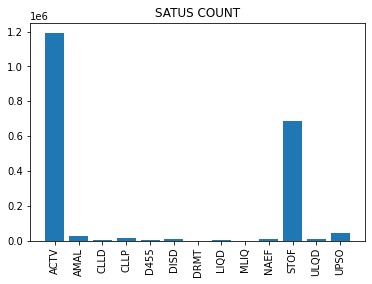

In [ ]:
plt.bar(index,status_count)
plt.title('SATUS COUNT')
plt.xticks(index,label,fontsize=10,rotation=90)
plt.show()

In [ ]:
status_data = data[(data['STATUS']!='ACTV') & (data['STATUS']!='STOF')]
status_count2 = status_data.groupby('STATUS').count()['ID']
status_count2

STATUS
AMAL    24887
CLLD     4874
CLLP    13175
D455     2145
DISD     9765
DRMT        2
LIQD     1120
MLIQ        1
NAEF     8814
ULQD     6458
UPSO    41456
Name: ID, dtype: int64

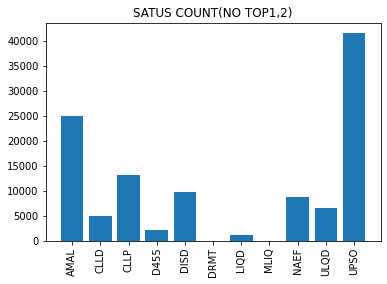

In [ ]:
label = ['AMAL','CLLD','CLLP','D455','DISD','DRMT','LIQD','MLIQ','NAEF','ULQD','UPSO']
index = np.arange(len(label))

plt.bar(index,status_count2)
plt.title('SATUS COUNT(NO TOP1,2)')
plt.xticks(index,label,fontsize=10,rotation=90)
plt.show()

In [ ]:
category_count = data.groupby(by=['CATEGORY','SUB_CATEGORY']).count()['ID']
category_count

CATEGORY   SUB_CATEGORY         
Guarantee  Foreign                        9
           Guarantee_Association       2308
           Non_govt                   18224
           State                         18
           Union                          4
Shares     Foreign                    12344
           Guarantee_Association         69
           Non_govt                 1949002
           State                       1889
           Union                        571
           Unknown                        4
Unknown    Unknown                     4234
Unlimited  Foreign                       16
           Guarantee_Association          7
           Non_govt                     938
           State                          5
           Union                          1
Name: ID, dtype: int64

In [ ]:
category_pivot = pd.pivot_table(data,index=['CATEGORY','SUB_CATEGORY'],aggfunc='count',values='ID',margins=True)
category_pivot

ID
CATEGORY  SUB_CATEGORY                  
Guarantee Foreign                      9
          Guarantee_Association     2308
          Non_govt                 18224
          State                       18
          Union                        4
Shares    Foreign                  12344
          Guarantee_Association       69
          Non_govt               1949002
          State                     1889
          Union                      571
          Unknown                      4
Unknown   Unknown                   4234
Unlimited Foreign                     16
          Guarantee_Association        7
          Non_govt                   938
          State                        5
          Union                        1
All                              1989643

In [ ]:
category_pivot.query("CATEGORY != 'Unknown'")

ID
CATEGORY  SUB_CATEGORY                  
Guarantee Foreign                      9
          Guarantee_Association     2308
          Non_govt                 18224
          State                       18
          Union                        4
Shares    Foreign                  12344
          Guarantee_Association       69
          Non_govt               1949002
          State                     1889
          Union                      571
          Unknown                      4
Unlimited Foreign                     16
          Guarantee_Association        7
          Non_govt                   938
          State                        5
          Union                        1
All                              1989643

In [ ]:
registered_count = data.groupby('REGISTERED').count()['ID']
registered_count

REGISTERED
Andaman and Nicobar Islands       480
Andhra Pradesh                  32989
Arunachal Pradesh                 629
Assam                           12078
Bihar                           35916
Chandigarh                      15018
Chattisgarh                     10703
Dadra and Nagra Haveli            550
Daman and Diu                     397
Delhi                          346575
Goa                              8940
Gujarat                        105541
Haryana                         50777
Himachal Pradesh                 6591
Jammu and Kashmir                5978
Jharkhand                       15078
Karnataka                      125692
Kerala                          56097
Lakshadweep                        18
Madhya Pradesh                  41317
Maharashtra                    394931
Manipur                          1056
Meghalaya                        1115
Mizoram                           175
Nagaland                          620
Orissa                          27021
P

In [ ]:
date_pivot = pd.pivot_table(data,index=['YEAR','MONTH'],aggfunc='count',values='ID',margins=True)
date_pivot

ID
YEAR MONTH         
1857 3            1
1863 7            1
     8            1
     9            1
1871 7            1
...             ...
2019 10        9933
     11       10607
     12       12057
2020 1        12747
All         1989643

[1522 rows x 1 columns]

In [ ]:
date_pivot2 = pd.pivot_table(data,index='YEAR',columns='MONTH',values='ID',aggfunc='count',margins=True)
date_pivot2

MONTH,1,2,3,4,5,6,7,8,9,10,11,12,All
YEAR,,,,,,,,,,,,,
1857,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1863,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,3
1871,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,3
1872,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3
1873,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,6979.0,9878.0,11306.0,9029.0,9679.0,9050.0,9398.0,9430.0,8858.0,7565.0,7906.0,8557.0,107635
2018,8663.0,8020.0,12043.0,10559.0,10774.0,9049.0,7751.0,7749.0,13405.0,11671.0,8753.0,9487.0,117924
2019,12475.0,11789.0,10590.0,10390.0,11294.0,9629.0,10712.0,10009.0,9173.0,9933.0,10607.0,12057.0,128658


In [ ]:
data["QUARTER"] = "QR"
data_condition_1 = (data["MONTH"]==1) | (data["MONTH"]==2) | (data["MONTH"]==3) 
data_condition_2 = (data["MONTH"]==4) | (data["MONTH"]==5) | (data["MONTH"]==6) 
data_condition_3 = (data["MONTH"]==7) | (data["MONTH"]==8) | (data["MONTH"]==9) 
data_condition_4 = (data["MONTH"]==10) | (data["MONTH"]==11) | (data["MONTH"]==12) 

data.loc[(data_condition_1),'QUARTER'] = '1QR'
data.loc[(data_condition_2),'QUARTER'] = '2QR'
data.loc[(data_condition_3),'QUARTER'] = '3QR'
data.loc[(data_condition_4),'QUARTER'] = '4QR'

In [ ]:
data.head(5)

,ID,NAME,STATUS,CLASS,CATEGORY,SUB_CATEGORY,REGISTERED,DATE,YEAR,MONTH,DAY,QUARTER,SEASON
0,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,1998-07-16,1998,7,16,3QR,summer
1,F01802,SOLVAY S A BELGIUM,NAEF,Unknown,Unknown,Unknown,Gujarat,2001-06-25,2001,6,25,2QR,summer
2,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-07-25,2001,7,25,3QR,summer
3,F01847,OVERSEAS TRADING AND SHIPPING CO LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-10-08,2001,10,8,4QR,fall
4,F01881,BALLAST NADAM INTERNATIONAL B V,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-12-31,2001,12,31,4QR,winter


In [ ]:
data["SEASON"] = "SEASON"
data_condition_spring = (data["MONTH"]==3) | (data["MONTH"]==4) | (data["MONTH"]==5)
data_condition_summer = (data["MONTH"]==6) | (data["MONTH"]==7) | (data["MONTH"]==8)
data_condition_fall = (data["MONTH"]==9) | (data["MONTH"]==10) | (data["MONTH"]==11)
data_condition_winter = (data["MONTH"]==12) | (data["MONTH"]==1) | (data["MONTH"]==2)

data.loc[(data_condition_spring),"SEASON"] = 'spring'
data.loc[(data_condition_summer),"SEASON"] = 'summer'
data.loc[(data_condition_fall),"SEASON"] = 'fall'
data.loc[(data_condition_winter),"SEASON"] = 'winter'

data.head()

,ID,NAME,STATUS,CLASS,CATEGORY,SUB_CATEGORY,REGISTERED,DATE,YEAR,MONTH,DAY,QUARTER,SEASON
0,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,1998-07-16,1998,7,16,3QR,summer
1,F01802,SOLVAY S A BELGIUM,NAEF,Unknown,Unknown,Unknown,Gujarat,2001-06-25,2001,6,25,2QR,summer
2,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-07-25,2001,7,25,3QR,summer
3,F01847,OVERSEAS TRADING AND SHIPPING CO LTD,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-10-08,2001,10,8,4QR,fall
4,F01881,BALLAST NADAM INTERNATIONAL B V,ACTV,Unknown,Unknown,Unknown,Gujarat,2001-12-31,2001,12,31,4QR,winter


In [ ]:
quarter_pivot = pd.pivot_table(data,index='QUARTER',values='ID',aggfunc='count')
quarter_pivot

,ID
QUARTER,
1QR,534368
2QR,495422
3QR,495773
4QR,464080


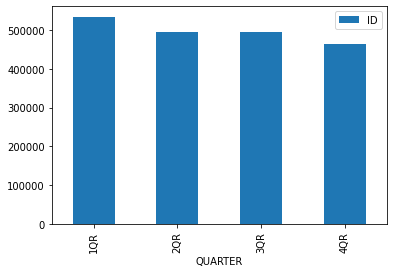

In [ ]:
quarter_pivot.plot(kind='bar')

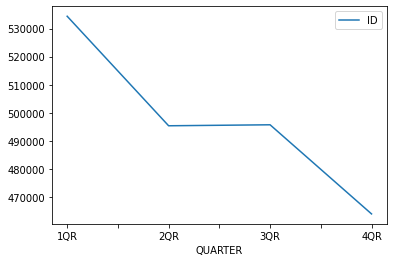

In [ ]:
quarter_pivot.plot()

In [ ]:
season_pivot = pd.pivot_table(data,index='SEASON',values='ID',aggfunc='count')
season_pivot

,ID
SEASON,
fall,462821
spring,523592
summer,493847
winter,509383


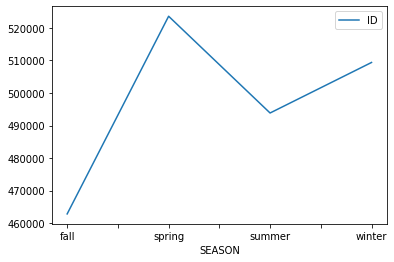

In [ ]:
season_pivot.plot()